In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

# November 25 ERT 1

In [3]:
data3 = ert.load('Surveys/full_data/nov_25_1_ERT_trim.dat')
print(data3)

Data: Sensors: 64 data: 2846, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


In [4]:
data3["k"] = ert.geometricFactors(data3)
data3["err"] = ert.estimateError(data3, relativeError=0.02, absoluteUError=50e-6)

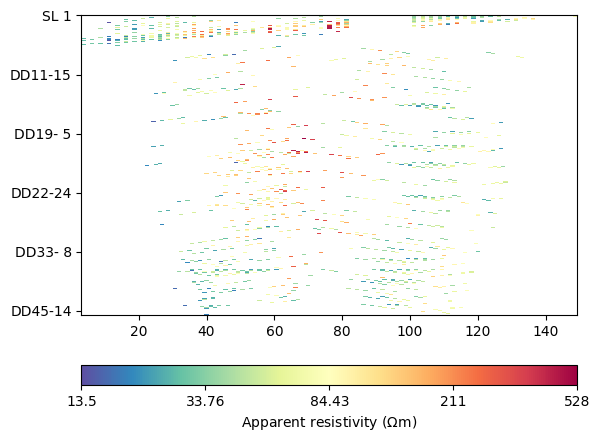

In [5]:
ax, cb = ert.show(data3)

<Axes: ylabel='Count'>

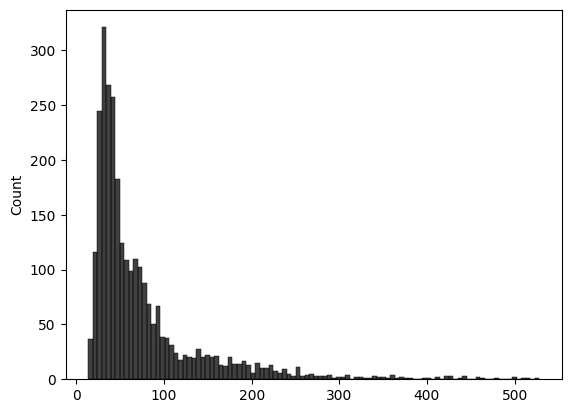

In [6]:
import seaborn as sns
sns.histplot(data3["rhoa"], bins=100, color="k", label="rhoa")

<Axes: ylabel='Count'>

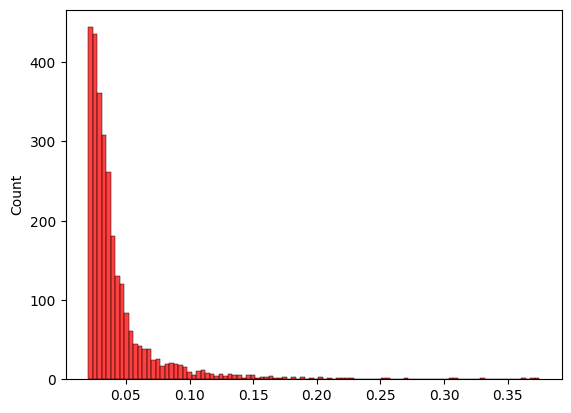

In [7]:
sns.histplot(data3["err"], bins=100, color="r", label="err")

In [8]:
mgr3 = ert.ERTManager(data3, verbose=True)
mgr3.invert(secNodes=1, paraMaxCellSize=10.0, 
            zWeight=0.2, verbose=1)

21/02/24 - 22:43:48 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 22:43:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 22:43:48 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 22:43:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 22:43:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/24 - 22:43:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  2

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  2

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 1795
  Mesh triangles: 3413
  Mesh edges: 5207
  Mesh exterior boundary edges: 175
  Mesh interior boundary edges: 76
  Mesh subsegments (constrained edges): 251



21/02/24 - 22:43:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7002 Cells: 13652 Boundaries: 10414
21/02/24 - 22:43:48 - pyGIMLi - INFO - Use median(data values)=49.4
21/02/24 - 22:43:48 - pyGIMLi - INFO - Created startmodel from forward operator: 2653 [49.4,...,49.4]
21/02/24 - 22:43:48 - pyGIMLi - INFO - Starting inversion.


ModellingBase::setMesh() copying new mesh ... Found topography for surface=1463.38 : 1463.24
Found datafile: 64 electrodes
Found: 64 node-electrodes
rMin = 1.25854, rMax = 320.05
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.0378994 s
FOP updating mesh dependencies ... 2.7e-06 s
min/max(dweight) = 2.66899/49.039
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f85f33a7790>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f85f327de40>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f85f362e0a0>
min/max (data): 13.5/528
min/max (error): 2.04%/37.47%
min/max (start model): 49.4/49.4
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 49.4 max = 49.4
Allocating memory for primary potential...... 0.0461683

No primary potential for secondary field calculation with topography.
Creating P

2653 [18.58197102966142,...,1875.8220389378967]

(1450.0, 1490.006104)

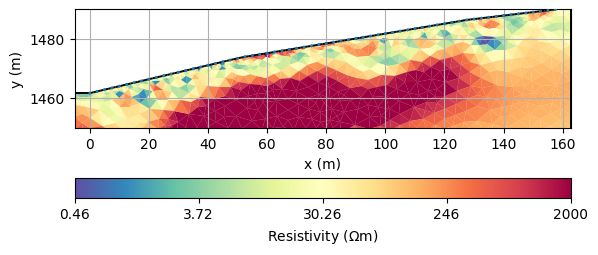

In [24]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax = 2000)
ax, cb = mgr3.showResult(**kw)
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])

array([<Axes: >, <Axes: >], dtype=object)

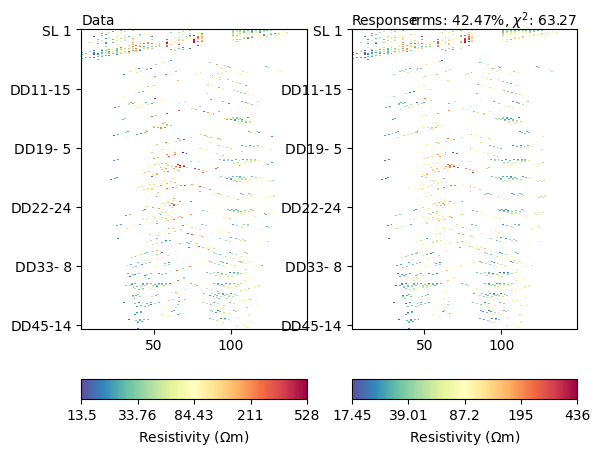

In [13]:
mgr3.showFit()